In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

A game company thinks that it's game will sell better if it's rated 'T' instead of 'E'

The Question:
Does a games rating have any bearing on how it will sell?

The Potential Solution:
Ensuring that their new game is rated 'E' for Everyone, instead of 'T' for Teen, will increase sales of their new game by making it seem more appealing to a mass market audience.

The Method:


Setup:
In order to test if there's any kind of meaningful relationship between a games rating and how many units it sells, we're going to need to look at some historical data.  For this I used a dataset of roughly 16k games sorted by sales data, that happened to include the rating for every game.

In [202]:
games = pd.read_csv('vgs12-22-2016.csv')
games.shape

(16719, 16)

Before running some initial tests, some cleaning was needed, starting off with removing null values as well as all ratings that are not of interest to us at this time.

In [203]:
games = games[games['Rating'].notnull()]
games = games[games['Rating'] != 'RP']
games = games[games['Rating'] != 'AO']
games = games[games['Rating'] != 'K-A']
games = games[games['Rating'] != 'EC']
games = games[games['Rating'] != 'M']
games.shape

(8372, 16)

This left us with 3 different ratings.

In [204]:
games.Rating.unique()

array(['E', 'T', 'E10+'], dtype=object)

I then decided to merge E10+ and E into E because they effectively mean the same thing.

In [205]:
games = games.replace('E10+', 'E')

After a bit more cleaning, the data 

In [206]:
games = games.replace('tbd', np.nan)
games['User_Score'] = pd.to_numeric(games['User_Score'])
games = games[games['Year_of_Release'] < 2017.0]
games = games[games['Rating'].notnull()]
games = games[games['Year_of_Release'].notnull()]
games.shape

(8219, 16)

To get a sense of whether or not this is even a worthwhile endeavor, let's group by Rating and look at some descriptive statistics.

In [207]:
rate_games = games.groupby('Rating')
rate_sales = rate_games['Global_Sales']
rate_sales.describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
E,5314.0,0.573931,1.888401,0.01,0.08,0.2,0.52,82.53
T,2905.0,0.507446,0.914574,0.01,0.08,0.2,0.54,12.84


Right away we can see that the average global sales for games rated 'Everyone' is slightly higher than games rated 'Teen'.  But numbers are boring, let's look at some cool charts!

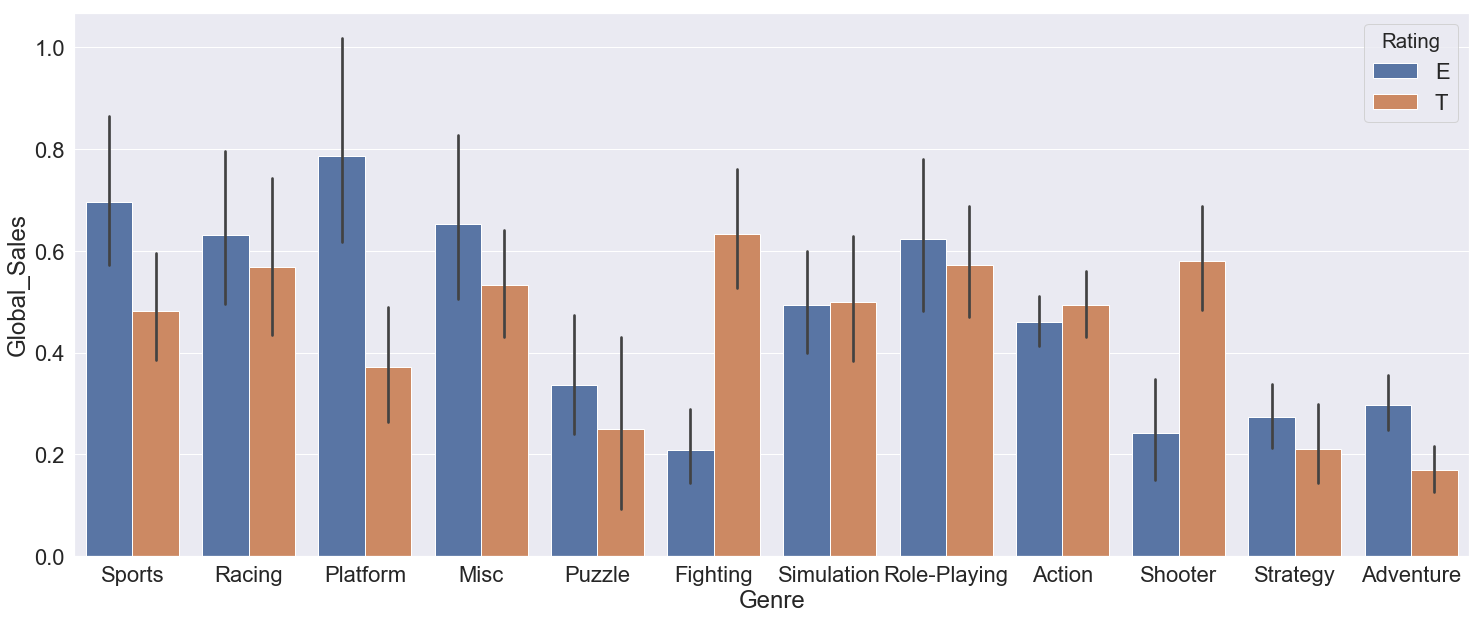

In [208]:
sns.set_style('whitegrid')
sns.set(font_scale = 2)
plt.subplots(figsize=(25,10))
sns.barplot(x='Genre', y='Global_Sales', hue='Rating', data=games)

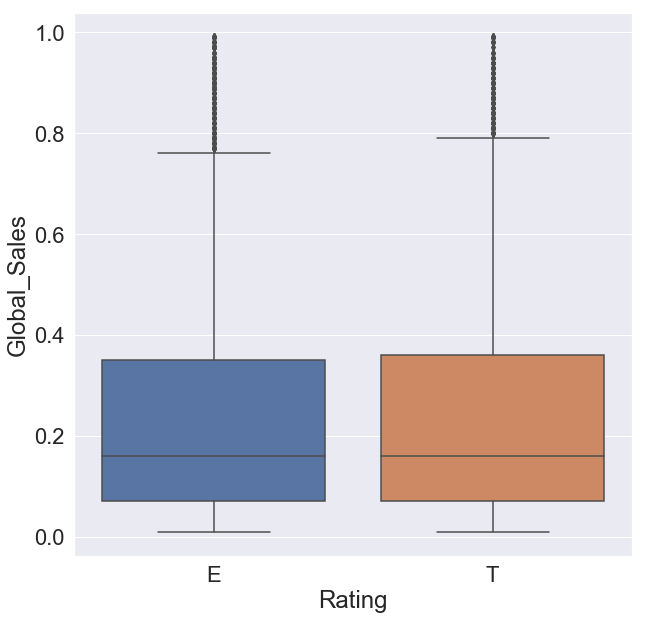

In [214]:
sales_norm = games[games['Global_Sales'] < 1]
plt.subplots(figsize=(10,10))
sns.boxplot(x='Rating', y='Global_Sales', 
            order=['E', 'T'], data=sales_norm)

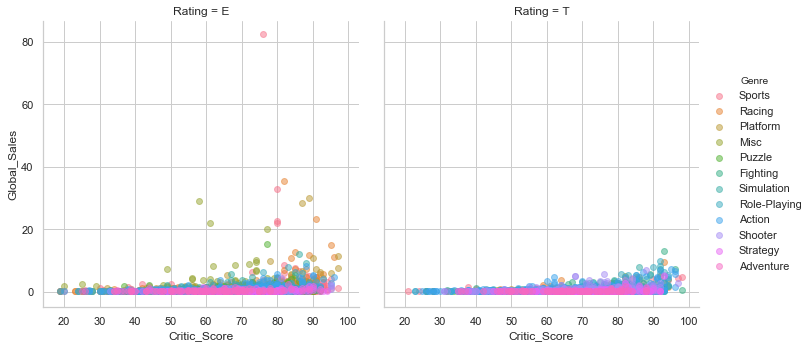

In [228]:
sns.lmplot(y='Global_Sales', x='Critic_Score', hue='Genre', data=games,
            col='Rating', fit_reg=False, ci=False, scatter_kws={'alpha':0.5})

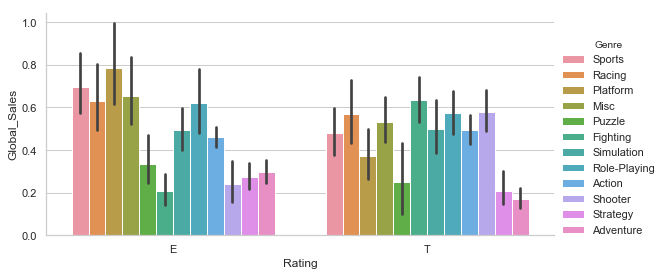

In [217]:
sns.set(style="whitegrid")
cat = sns.catplot(x="Rating", y="Global_Sales", hue='Genre', data=games,  
                  height=4, aspect=2, kind="bar")

Wow charts are cool.  But does

In [209]:
stats.ttest_ind(games[games.Rating == 'E'].Global_Sales,
                games[games.Rating == 'T'].Global_Sales, equal_var=False)

Ttest_indResult(statistic=2.146921406507474, pvalue=0.031829077444646366)

With a p-value of < 0.05, it looks like we can say that, based on prior video game sales data, there is a statistically significant difference between global sales of games rated 'E' versus games rated 'T'.

In [242]:
plat = games.loc[(games['Platform'] == 'Wii')]
plat.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E
39,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.62,2.55,2.66,1.01,12.84,93.0,81.0,8.9,1662.0,Game Arts,T
49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0,8.9,2147.0,Nintendo,E
61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,5.95,3.11,0.00,1.06,10.12,74.0,15.0,7.8,16.0,Ubisoft,E


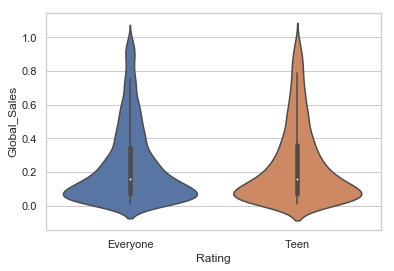

In [163]:
games_no_out = games[games['Global_Sales'] < 1]
sns.violinplot(x='Rating', y='Global_Sales', data=games_no_out)

 But is this difference statistically significant?  Time for a nice T-Test!